In [18]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import text
import os
import geopandas as gpd

## Add the passworkd to User Variabels for Administrator

- System Properties
- Envrionment Variables
- New
- Variable name: SQL_PASSWORD ; Variable value: *the password for postgresql*

In [4]:
host = 'localhost'
database = 'spatialdata'
user = 'postgres'
port = '5432'
password = os.getenv('SQL_PASSWORD')

**Check your passworkd**

print(os.getenv('SQL_PASSWORD'))

In [5]:
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

In [6]:
engine = create_engine(connection_string)
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys', 'nyc_census_blocks_2000', 'nyc_subway_stations']

## Select Ten Features FROM nyc_neighborhoods

In [28]:
streets = text("SELECT * FROM  ch05.nyc_neighborhoods LIMIT 10")

sub_streetsub_street = gpd.read_postgis(streets, con=engine)

<Axes: >

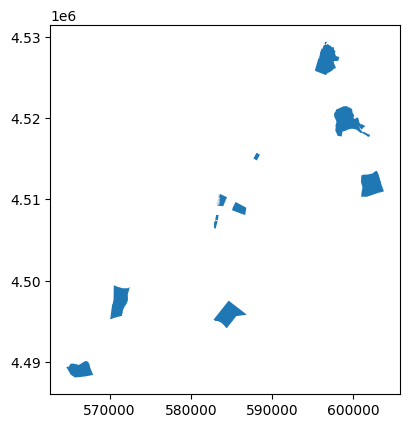

In [30]:
sub_streetsub_street.plot()

## Select All features from nyc_neighborhoods

<Axes: >

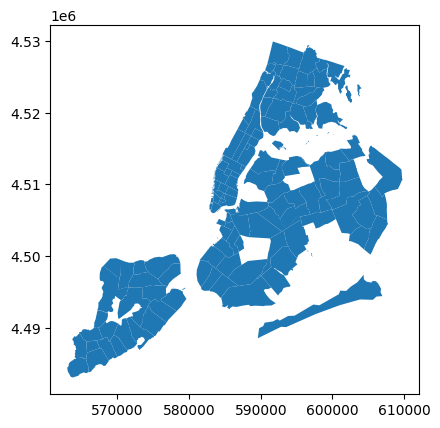

In [44]:
query = text("SELECT * FROM ch05.nyc_neighborhoods")
neighborhood_shp = gpd.read_postgis(query, con=engine)
neighborhood_shp.plot()

## ST_Instersects

Identify all subway stations that intersect with neighborhoods = 'Manhattan'

<Axes: >

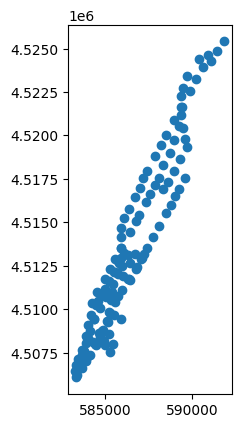

In [48]:
# Write and execute your SQL query
query = text("""SELECT nbh.NAME AS nbh_name, subways.NAME AS subway_name, subways.geom
FROM ch05.nyc_neighborhoods nbh, ch05.nyc_subway_stations subways  
WHERE ST_Intersects(nbh.geom, subways.geom) AND nbh.boroname = 'Manhattan'
                """)

all_nbg = text("SELECT * FROM ch05.nyc_neighborhoods")

sub_subway = gpd.read_postgis(query, con=engine)

sub_subway.plot()


## Plot neighborhoods and Manhattan

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25816\3855605619.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


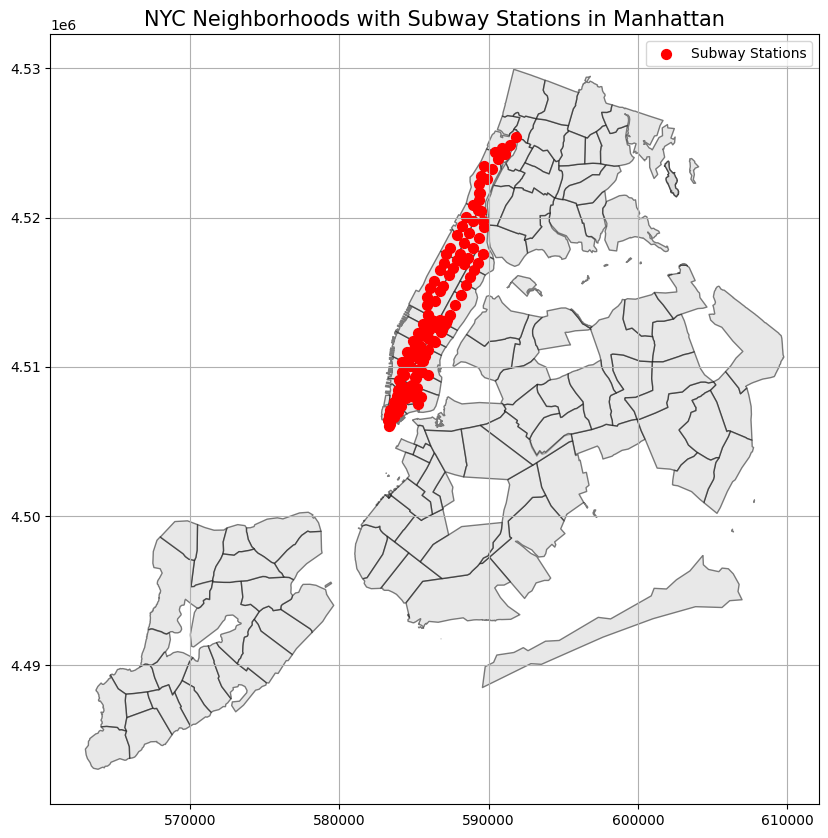

In [49]:
fig, ax = plt.subplots(figsize=(12, 10))

neighborhood_shp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5, label='Neighborhoods')

# Plot subway stations in red
sub_subway.plot(ax=ax, color='red', markersize=50, label='Subway Stations')

# Add title, legend, and grid
plt.title('NYC Neighborhoods with Subway Stations in Manhattan', fontsize=15)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Exercise 1: Select subway stations that locate in neighborhoods in 'Queens', 'Brooklyn'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25816\956140008.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


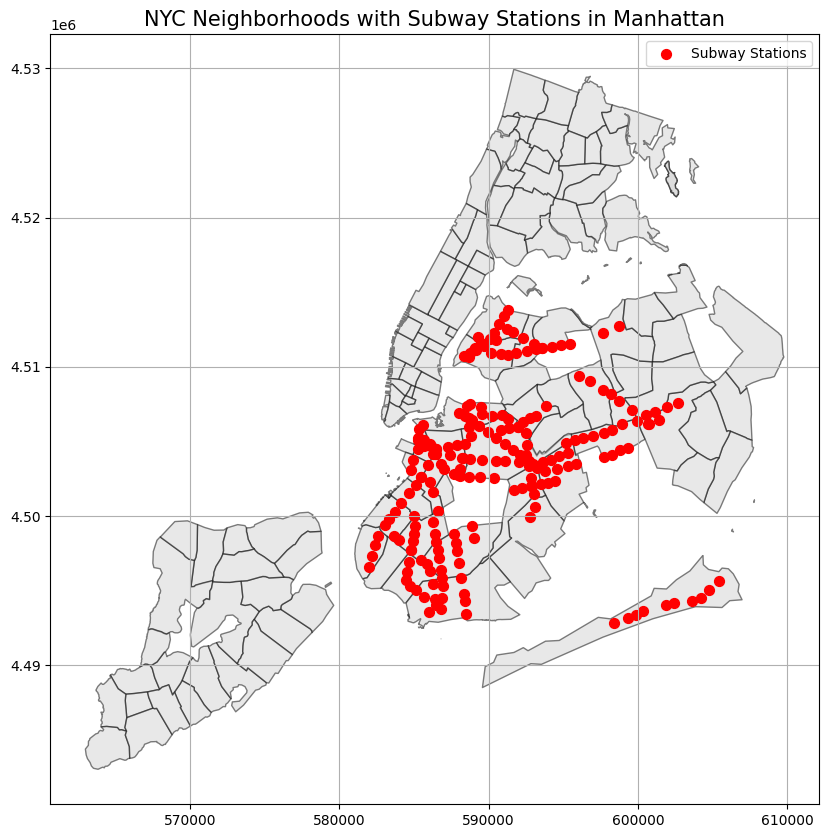

In [51]:
query = text("""SELECT nbh.NAME AS nbh_name, subways.NAME AS subway_name, subways.geom
FROM ch05.nyc_neighborhoods nbh, ch05.nyc_subway_stations subways  
WHERE ST_Intersects(nbh.geom, subways.geom) AND nbh.boroname IN ('Queens', 'Brooklyn')
                """)

subway_intwo = gpd.read_postgis(query, con=engine)

fig, ax = plt.subplots(figsize=(12, 10))

neighborhood_shp.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5, label='Neighborhoods')

# Plot subway stations in red
subway_intwo.plot(ax=ax, color='red', markersize=50, label='Subway Stations')

# Add title, legend, and grid
plt.title('NYC Neighborhoods with Subway Stations in Manhattan', fontsize=15)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()